In [13]:
from photutils import CircularAperture, CircularAnnulus, SkyCircularAperture, SkyCircularAnnulus
from astropy import units as u
from astropy.coordinates import SkyCoord
import astropy.io.fits as fits
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from photutils import aperture_photometry, MMMBackground
import glob
from astropy.table import Table
from photutils import DAOStarFinder
from datetime import datetime, date
import time
from astropy.stats import sigma_clipped_stats

In [14]:
test = fits.getdata('szkody/homer/f22.348.fits')

In [15]:
position = [736,923]
comparison = [824.4,919.4]
comparison2 = [1253.5,694]
#comparison2 = [824.4,1185.5]

In [16]:
aperture_test = CircularAperture(position, r = 4)
comparison_test = CircularAperture(comparison, r = 4)
comparison2_test = CircularAperture(comparison2, r = 10)

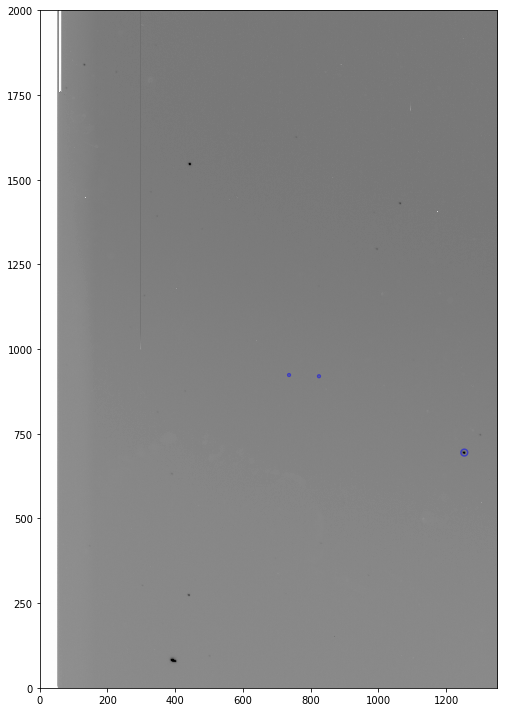

In [17]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(test, cmap = 'Greys', origin = 'lower', norm = LogNorm())
aperture_test.plot(color='blue', lw=1.5, alpha=0.5)
comparison_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)
comparison2_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)

In [18]:
test_data = aperture_photometry(test, aperture_test, method = 'exact')
test_data['counts'] = test_data['aperture_sum'] / (np.pi * 4**2)
test_data

id,xcenter,ycenter,aperture_sum,counts
,pix,pix,,
int32,float64,float64,float64,float64
1,736.0,923.0,543504.8421380796,10812.685277581952


In [19]:
daofind = DAOStarFinder(fwhm=3.0, threshold=500)
sources = daofind(test)
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,397.74147424020003,79.36739339684664,0.46923393825887544,-0.5850715188240425,-0.5153634444952604,25.0,0.0,128881.0,107.71949271393652,-5.080735748776437
2,388.56587727047673,83.0928615566893,0.4521630831626671,0.4813796707283785,-0.03814455782062289,25.0,0.0,123105.0,94.85416062440264,-4.942640963169494
3,500.66257689029595,93.97877451403407,0.49937724038062065,-0.45784052742901504,-0.08518240514238681,25.0,0.0,11642.0,3.1784550087987804,-1.2555401708707168
4,439.39585658125884,273.37368026196344,0.4551807414809914,-0.44949054708386443,0.009501109354720389,25.0,0.0,42184.0,36.56154412651008,-3.907561323197526
5,725.5319985618717,277.294967262109,0.5453154263745889,-0.9932578217798186,-0.44302391324518453,25.0,0.0,9806.0,1.0143915351604367,-0.015514041189246394
6,302.501479556529,302.1569530497229,0.509333695942748,-0.4284185877718343,-0.11994650162132707,25.0,0.0,11722.0,2.8074404563500055,-1.1207763849491856
7,969.5379485322643,331.4761119077961,0.4948998352535357,-0.45751615763163217,-0.1189970884483531,25.0,0.0,10907.0,2.063537976016727,-0.7865311644035254
8,147.11303137349114,418.6998642692477,0.43083839810358315,-0.45909738652813453,-0.21463508471444154,25.0,0.0,10763.0,2.5250988486000367,-1.0056959596627029
9,829.1142797204036,426.7852846910588,0.30343269266064654,-0.1414449224924716,0.022997631199740014,25.0,0.0,10742.0,1.6511886764889914,-0.5444917541386127


In [20]:
daofind2 = DAOStarFinder(fwhm=12, threshold=500)
sources2 = daofind(test)
sources2

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,397.74147424020003,79.36739339684664,0.46923393825887544,-0.5850715188240425,-0.5153634444952604,25.0,0.0,128881.0,83.82622610078079,-4.8084497861024
2,388.56587727047673,83.0928615566893,0.4521630831626671,0.4813796707283785,-0.03814455782062289,25.0,0.0,123105.0,73.81455403077882,-4.670355000495457
3,500.66257689029595,93.97877451403407,0.49937724038062065,-0.45784052742901504,-0.08518240514238681,25.0,0.0,11642.0,2.473441728195723,-0.9832542081966787
4,439.39585658125884,273.37368026196344,0.4551807414809914,-0.44949054708386443,0.009501109354720389,25.0,0.0,42184.0,28.451826009629805,-3.6352753605234875
5,302.501479556529,302.1569530497229,0.509333695942748,-0.4284185877718343,-0.11994650162132707,25.0,0.0,11722.0,2.1847219340648394,-0.8484904222751476
6,969.5379485322643,331.4761119077961,0.4948998352535357,-0.45751615763163217,-0.1189970884483531,25.0,0.0,10907.0,1.6058245038759462,-0.5142452017294872
7,147.11303137349114,418.6998642692477,0.43083839810358315,-0.45909738652813453,-0.21463508471444154,25.0,0.0,10763.0,1.9650065338841178,-0.7334099969886647
8,829.1142797204036,426.7852846910588,0.30343269266064654,-0.1414449224924716,0.022997631199740014,25.0,0.0,10742.0,1.284938425192821,-0.2722057914645745
9,1343.6643821174089,604.4950522417688,0.6326471847668068,-0.1186164677939809,-0.6869852511092803,25.0,0.0,10258.0,1.0881943062151986,-0.09176612301635756


In [21]:
gwlib = np.where((sources['xcentroid'] > 730) & (sources['xcentroid'] < 740)
                & (sources['ycentroid'] > 917) & (sources['ycentroid'] < 927))
c1 = np.where((sources['xcentroid'] > 820) & (sources['xcentroid'] < 830)
                & (sources['ycentroid'] > 915) & (sources['ycentroid'] < 925))
#c2 = np.where((sources2['xcentroid'] > 1230) & (sources2['xcentroid'] < 1280)
#                & (sources2['ycentroid'] > 670) & (sources2['ycentroid'] < 720))

In [22]:
files_list = glob.glob('szkody/homer/f22*.fits')

In [23]:
len(files_list)
files_list.sort()
files_list

['szkody/homer\\f22.345.fits',
 'szkody/homer\\f22.346.fits',
 'szkody/homer\\f22.347.fits',
 'szkody/homer\\f22.348.fits',
 'szkody/homer\\f22.349.fits',
 'szkody/homer\\f22.350.fits',
 'szkody/homer\\f22.351.fits',
 'szkody/homer\\f22.352.fits',
 'szkody/homer\\f22.353.fits',
 'szkody/homer\\f22.354.fits',
 'szkody/homer\\f22.355.fits',
 'szkody/homer\\f22.356.fits',
 'szkody/homer\\f22.357.fits',
 'szkody/homer\\f22.358.fits',
 'szkody/homer\\f22.359.fits',
 'szkody/homer\\f22.360.fits',
 'szkody/homer\\f22.361.fits',
 'szkody/homer\\f22.362.fits',
 'szkody/homer\\f22.363.fits',
 'szkody/homer\\f22.364.fits',
 'szkody/homer\\f22.365.fits',
 'szkody/homer\\f22.366.fits',
 'szkody/homer\\f22.367.fits',
 'szkody/homer\\f22.368.fits',
 'szkody/homer\\f22.369.fits',
 'szkody/homer\\f22.370.fits',
 'szkody/homer\\f22.371.fits',
 'szkody/homer\\f22.372.fits',
 'szkody/homer\\f22.373.fits',
 'szkody/homer\\f22.374.fits',
 'szkody/homer\\f22.375.fits',
 'szkody/homer\\f22.376.fits',
 'szkody

In [24]:
files_data = []
for file in files_list:
    files_data.append(fits.getdata(file))

In [25]:
#files_list[109]
len(files_data)


65

In [26]:
gwlib_data = []
for i in range(2,65):
    gwlib_data.append(files_data[i])

In [27]:
#you keep forgetting the diggity dang overscan!!!!

flat = fits.getdata('szkody/homer/bgflat.fits')
flat2 = fits.getdata('szkody/homer/bgflat.fits')
bias = fits.getdata('szkody/homer/bias.fits')
f_m = flat2.mean()

for x in range(0, len(flat)):
    for y in range(0, len(flat[x])):
        flat[x][y] = flat[x][y] / f_m

for i in range(0,63):
    gwlib_data[i] = gwlib_data[i] - bias

for i in range(0,63):
    gwlib_data[i] = gwlib_data[i] / flat

In [28]:
gwlib_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))
#find = DAOStarFinder(fwhm=3.0, threshold=200)

for i in range(0,63):
    #sources = find(gwlib_data[i])
    #gwlib = np.where((sources['xcentroid'] > 725) & (sources['xcentroid'] < 745)
    #            & (sources['ycentroid'] > 910) & (sources['ycentroid'] < 930))
    #pos = [sources[gwlib]['xcentroid'], sources[gwlib]['ycentroid']]
    #aper = CircularAperture(pos, r = 6)
    #print(pos)
    gwlib_apertures.add_row(aperture_photometry(gwlib_data[i], aperture_test, method = 'exact')[0])

In [29]:
gwlib_apertures['counts per pixel'] = gwlib_apertures['aperture_sum'] / aperture_test.area()
gwlib_apertures

id,xcenter,ycenter,aperture_sum,counts per pixel
float64,float64,float64,float64,float64
1.0,736.0,923.0,441562.501453229,8784.606848787951
1.0,736.0,923.0,502048.03380258114,9987.928281155968
1.0,736.0,923.0,496056.24050529057,9868.725340999883
1.0,736.0,923.0,465517.465541056,9261.175717058764
1.0,736.0,923.0,473615.7792869235,9422.286549979248
1.0,736.0,923.0,460086.9650557714,9153.139342596767
1.0,736.0,923.0,467727.9941453238,9305.152786335671
1.0,736.0,923.0,461544.7165778085,9182.14038766326
1.0,736.0,923.0,457902.6046415727,9109.682872920019


In [30]:
comparison_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,63):
    comparison_apertures.add_row(aperture_photometry(gwlib_data[i], comparison_test, method = 'exact')[0])

comparison_apertures['counts per pixel'] = comparison_apertures['aperture_sum'] / comparison_test.area()

In [31]:
comparison2_apertures = Table(names = ('id','xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,63):
    comparison2_apertures.add_row(aperture_photometry(gwlib_data[i], comparison2_test, method = 'exact')[0])

comparison2_apertures['counts per pixel'] = comparison2_apertures['aperture_sum'] / comparison2_test.area()

In [32]:
annuli_test = CircularAnnulus(position, 10, 15)
comp_an_test = CircularAnnulus(comparison, 10, 15)
comp2_an_test = CircularAnnulus(comparison2, 15, 20)

gwlib_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))
comparison_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))
comparison2_annuli = Table(names = ('id', 'xcenter', 'ycenter', 'aperture_sum'))

for i in range(0,63):
    gwlib_annuli.add_row(aperture_photometry(gwlib_data[i], annuli_test, method = 'exact')[0])
    comparison_annuli.add_row(aperture_photometry(gwlib_data[i], comp_an_test, method = 'exact')[0])
    comparison2_annuli.add_row(aperture_photometry(gwlib_data[i], comp2_an_test, method = 'exact')[0])

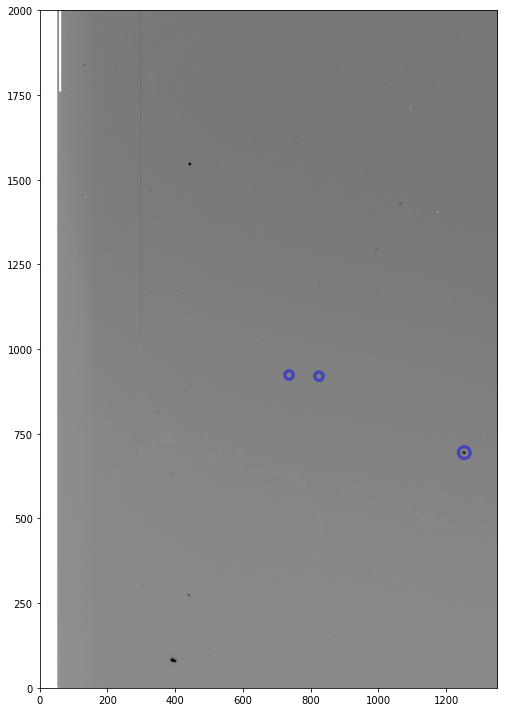

In [33]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(test, cmap = 'Greys', origin = 'lower', norm = LogNorm())
annuli_test.plot(color='blue', lw=1.5, alpha=0.5)
comp_an_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)
comp2_an_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)

In [34]:
gwlib_annuli['counts per pixel'] = gwlib_annuli['aperture_sum'] / annuli_test.area()
comparison_annuli['counts per pixel'] = comparison_annuli['aperture_sum'] / comp_an_test.area()
comparison2_annuli['counts per pixel'] = comparison2_annuli['aperture_sum'] / comp2_an_test.area()

In [35]:
gwlib_apertures['bkg subtracted'] = gwlib_apertures['counts per pixel'] - gwlib_annuli['counts per pixel']
comparison_apertures['bkg subtracted'] = comparison_apertures['counts per pixel'] - comparison_annuli['counts per pixel']
comparison2_apertures['bkg subtracted'] = comparison2_apertures['counts per pixel'] - comparison2_annuli['counts per pixel']

In [36]:
print(gwlib_annuli)
print(comparison_annuli)
print(comparison2_annuli)

 id xcenter ycenter    aperture_sum     counts per pixel 
--- ------- ------- ------------------ ------------------
1.0   736.0   923.0 3147773.9221738256  8015.740471195639
1.0   736.0   923.0  3796144.023565231  9666.801376626607
1.0   736.0   923.0 3505848.6251686425  8927.570214840238
1.0   736.0   923.0  3127427.163664918  7963.927876114203
1.0   736.0   923.0  3133189.078499981     7978.600471757
1.0   736.0   923.0 2980030.0930966805 7588.5843180630045
1.0   736.0   923.0  3018572.368060181  7686.731415318174
1.0   736.0   923.0  2918682.861728395  7432.364876186767
1.0   736.0   923.0  2870448.667718958  7309.537509744282
1.0   736.0   923.0  2878428.503180438  7329.857993884355
...     ...     ...                ...                ...
1.0   736.0   923.0 2850640.1059806272   7259.09542148514
1.0   736.0   923.0  2817018.044831681  7173.477545824456
1.0   736.0   923.0  2862824.889476493  7290.123717867085
1.0   736.0   923.0  2940758.218268295  7488.579310008225
1.0   736.0   

In [37]:
#fuck fuck fuck fuck fuck

print(gwlib_apertures)
print(comparison_apertures)
print(comparison2_apertures)

 id xcenter ycenter    aperture_sum     counts per pixel   bkg subtracted  
--- ------- ------- ------------------ ----------------- ------------------
1.0   736.0   923.0   441562.501453229 8784.606848787951  768.8663775923123
1.0   736.0   923.0 502048.03380258114 9987.928281155968  321.1269045293611
1.0   736.0   923.0 496056.24050529057 9868.725340999883  941.1551261596451
1.0   736.0   923.0   465517.465541056 9261.175717058764 1297.2478409445612
1.0   736.0   923.0  473615.7792869235 9422.286549979248 1443.6860782222475
1.0   736.0   923.0  460086.9650557714 9153.139342596767 1564.5550245337627
1.0   736.0   923.0  467727.9941453238 9305.152786335671 1618.4213710174972
1.0   736.0   923.0  461544.7165778085  9182.14038766326 1749.7755114764923
1.0   736.0   923.0  457902.6046415727 9109.682872920019 1800.1453631757367
1.0   736.0   923.0  456367.6237874947 9079.145399110279  1749.287405225924
...     ...     ...                ...               ...                ...
1.0   736.0 

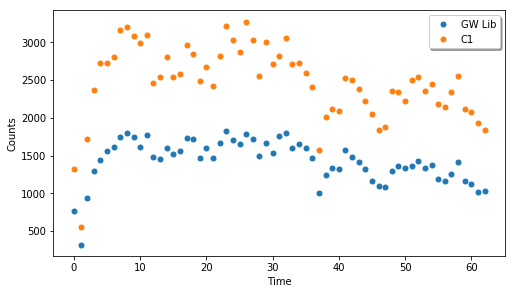

In [38]:
#this is a test plot
#need time from headers
#subtract background without weirdness

time_test = []
for i in range(0,63):
    time_test.append(i)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
fig.tight_layout()
ax.set_xlabel("Time")
ax.set_ylabel("Counts")


ax.plot(time_test, gwlib_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'GW Lib')
ax.plot(time_test, comparison_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'C1')
#ax.plot(time_test, comparison2_apertures['bkg subtracted'], marker = 'o', linestyle = 'None', markersize = 5, label = 'C2')
ax.legend(loc=0,shadow=True);

In [39]:
gwlib_apertures['frac of comp'] = gwlib_apertures['bkg subtracted'] / comparison_apertures['bkg subtracted']
comparison_apertures['frac of comp2'] = comparison_apertures['bkg subtracted'] / comparison2_apertures['bkg subtracted']

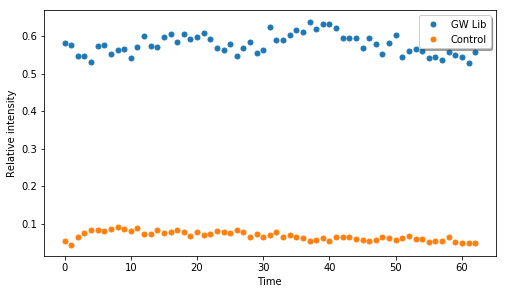

In [40]:
#this is a test plot
#need time from headers

fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
fig.tight_layout()
ax.set_xlabel("Time")
ax.set_ylabel("Relative intensity")


ax.plot(time_test, gwlib_apertures['frac of comp'], marker = 'o', linestyle = 'None', markersize = 5, label = 'GW Lib')
ax.plot(time_test, comparison_apertures['frac of comp2'], marker = 'o', linestyle = 'None', markersize = 5, label = 'Control')
ax.legend(loc=0,shadow=True);

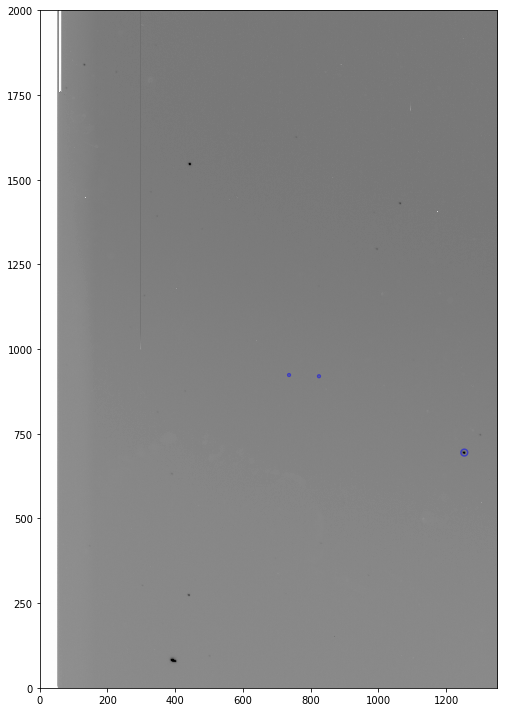

In [41]:
#how do zoom?

fig, ax = plt.subplots(1,1)

fig.set_size_inches(10,10)

fig.tight_layout()

ax.imshow(test, cmap = 'Greys', origin = 'lower', norm = LogNorm())
aperture_test.plot(color='blue', lw=1.5, alpha=0.5)
comparison_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)
comparison2_test.plot(color = 'blue', lw = 1.5, alpha = 0.5)

In [42]:
files_headers = []
for file in files_list:
    files_headers.append(fits.getheader(file))

In [43]:
#files_headers[109]

In [44]:
gwlib_times = []
for i in range(2,65):
    gwlib_times.append(files_headers[i]['UT'])

In [45]:
gwlib_times

['11:35:46.50',
 '11:37:07.91',
 '11:38:29.56',
 '11:39:51.05',
 '11:41:12.17',
 '11:42:33.49',
 '11:43:54.95',
 '11:45:16.30',
 '11:46:37.64',
 '11:47:58.88',
 '11:49:20.36',
 '11:50:41.82',
 '11:52:03.24',
 '11:53:24.75',
 '11:54:46.28',
 '11:56:07.64',
 '11:57:29.09',
 '11:58:50.61',
 '12:00:12.17',
 '12:01:33.67',
 '12:02:54.96',
 '12:04:16.29',
 '12:05:37.49',
 '12:06:58.98',
 '12:08:20.43',
 '12:09:41.72',
 '12:11:03.00',
 '12:12:24.54',
 '12:13:45.99',
 '12:15:07.44',
 '12:16:28.74',
 '12:17:50.47',
 '12:19:11.96',
 '12:20:33.45',
 '12:21:54.79',
 '12:23:16.23',
 '12:24:37.61',
 '12:25:59.08',
 '12:27:20.84',
 '12:28:42.34',
 '12:30:03.79',
 '12:31:25.14',
 '12:32:46.61',
 '12:34:08.06',
 '12:35:29.42',
 '12:36:50.97',
 '12:38:12.45',
 '12:39:33.75',
 '12:40:55.17',
 '12:42:16.61',
 '12:43:38.16',
 '12:44:59.56',
 '12:46:20.90',
 '12:47:42.43',
 '12:49:03.82',
 '12:50:25.18',
 '12:51:46.71',
 '12:53:08.00',
 '12:54:29.41',
 '12:55:50.77',
 '12:57:12.12',
 '12:58:33.58',
 '12:59:

In [46]:
time_list = []
init_time = 0
for i in range(2, 65):
    header = fits.getheader(files_list[i])
    d = datetime.strptime(header['UT'], '%H:%M:%S.%f')  # + t.microsecond / 1E6
    if i==2:
        init_time = d
    time_list.append((d - init_time).total_seconds())
print(time_list)

[0.0, 81.41, 163.06, 244.55, 325.67, 406.99, 488.45, 569.8, 651.14, 732.38, 813.86, 895.32, 976.74, 1058.25, 1139.78, 1221.14, 1302.59, 1384.11, 1465.67, 1547.17, 1628.46, 1709.79, 1790.99, 1872.48, 1953.93, 2035.22, 2116.5, 2198.04, 2279.49, 2360.94, 2442.24, 2523.97, 2605.46, 2686.95, 2768.29, 2849.73, 2931.11, 3012.58, 3094.34, 3175.84, 3257.29, 3338.64, 3420.11, 3501.56, 3582.92, 3664.47, 3745.95, 3827.25, 3908.67, 3990.11, 4071.66, 4153.06, 4234.4, 4315.93, 4397.32, 4478.68, 4560.21, 4641.5, 4722.91, 4804.27, 4885.62, 4967.08, 5048.63]


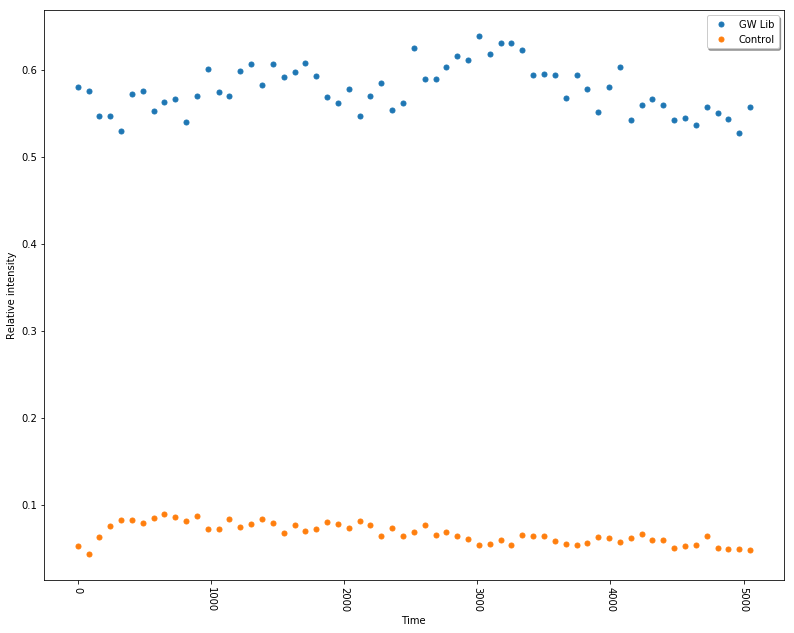

In [47]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)
fig.tight_layout()
ax.set_xlabel("Time")
ax.set_ylabel("Relative intensity")


ax.plot(time_list, gwlib_apertures['frac of comp'], marker = 'o', linestyle = 'None', markersize = 5, label = 'GW Lib')
ax.plot(time_list, comparison_apertures['frac of comp2'], marker = 'o', linestyle = 'None', markersize = 5, label = 'Control')
ax.legend(loc=0,shadow=True);
for tick in ax.get_xticklabels():
    tick.set_rotation(-90)

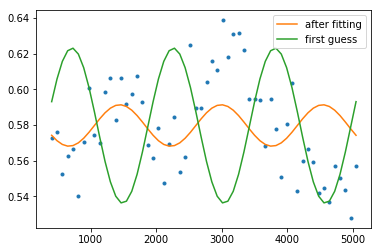

In [48]:
cut_dat = []
cut_tim = []
cut_amt = 5 #not the best way to do this
for i in range(cut_amt, len(time_list)):
    cut_dat.append(gwlib_apertures['frac of comp'][i])
    cut_tim.append(time_list[i])
from scipy.optimize import leastsq
N = len(cut_tim)
t = np.linspace(0, 6*np.pi, N)
tt = cut_tim
data = cut_dat

guess_mean = np.mean(data)
guess_std = 2.3*np.std(data)/(2**0.5)
guess_phase = .1*np.pi

data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

optimize_func = lambda x: x[0]*np.sin(t+x[1]) + x[2] - data
est_std, est_phase, est_mean = leastsq(optimize_func, [guess_std, guess_phase, guess_mean])[0]

data_fit = est_std*np.sin(t+est_phase) + est_mean
fig.set_size_inches(11,8.5)

plt.plot(tt, data, '.')
plt.plot(tt, data_fit, label='after fitting')
plt.plot(tt, data_first_guess, label='first guess')
plt.legend()
plt.show()

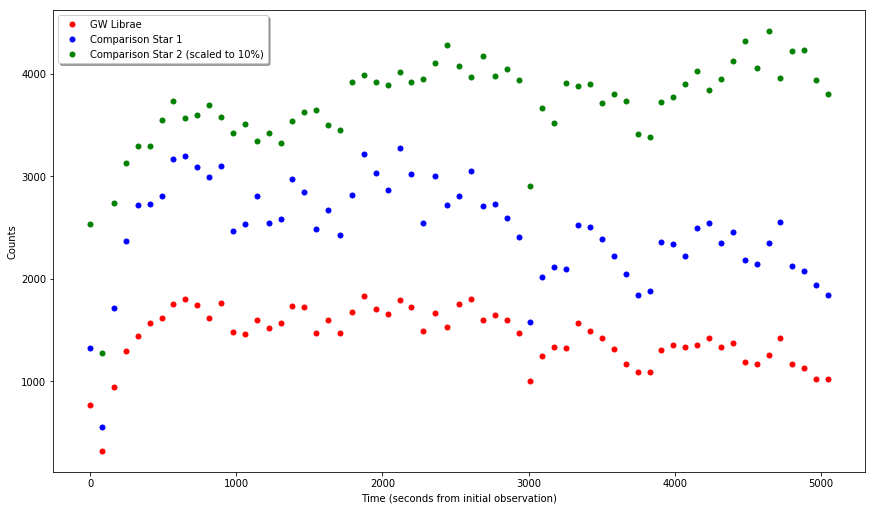

In [49]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,7)
fig.tight_layout()
ax.set_xlabel("Time (seconds from initial observation)")
ax.set_ylabel("Counts")


ax.plot(time_list, gwlib_apertures['bkg subtracted'], 'ro', linestyle = 'None', markersize = 5, label = 'GW Librae')
ax.plot(time_list, comparison_apertures['bkg subtracted'], 'bo', linestyle = 'None', markersize = 5, label = 'Comparison Star 1')
ax.plot(time_list, comparison2_apertures['bkg subtracted']/10,'go', linestyle = 'None', markersize = 5, label = 'Comparison Star 2 (scaled to 10%)')
ax.legend(loc=0,shadow=True);

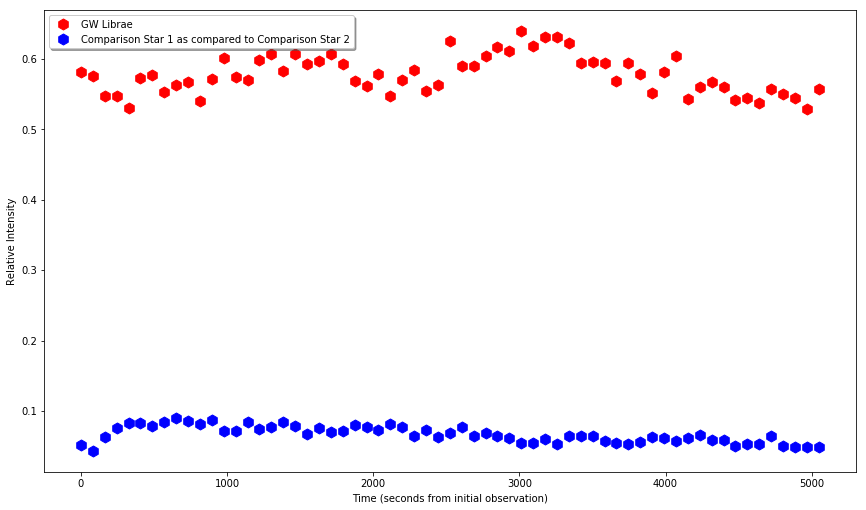

In [50]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,7)
fig.tight_layout()
ax.set_xlabel("Time (seconds from initial observation)")
ax.set_ylabel("Relative Intensity")


ax.plot(time_list, gwlib_apertures['frac of comp'], 'rh', linestyle = 'None', markersize = 11, label = 'GW Librae')
ax.plot(time_list, comparison_apertures['frac of comp2'], 'bh', linestyle = 'None', markersize = 11, label = 'Comparison Star 1 as compared to Comparison Star 2')
ax.legend(loc=0,shadow=True);

In [51]:
from scipy.optimize import curve_fit

In [52]:
def fit(x, a, b, c, d, e):
    return a*np.sin(b*x) + c*np.sin(d*x) + e

In [53]:
a_0 = 0.06
b_0 = (2*np.pi) / 1100
c_0 = 0.04
d_0 = (2*np.pi) / 15000
e_0 = 0.57

fitpars, error = curve_fit(fit,time_list,gwlib_apertures['frac of comp'],p0=[a_0,b_0,c_0,d_0,e_0])

In [54]:
print(fitpars)

[0.00755072 0.00483699 0.05296093 0.00062739 0.54491222]


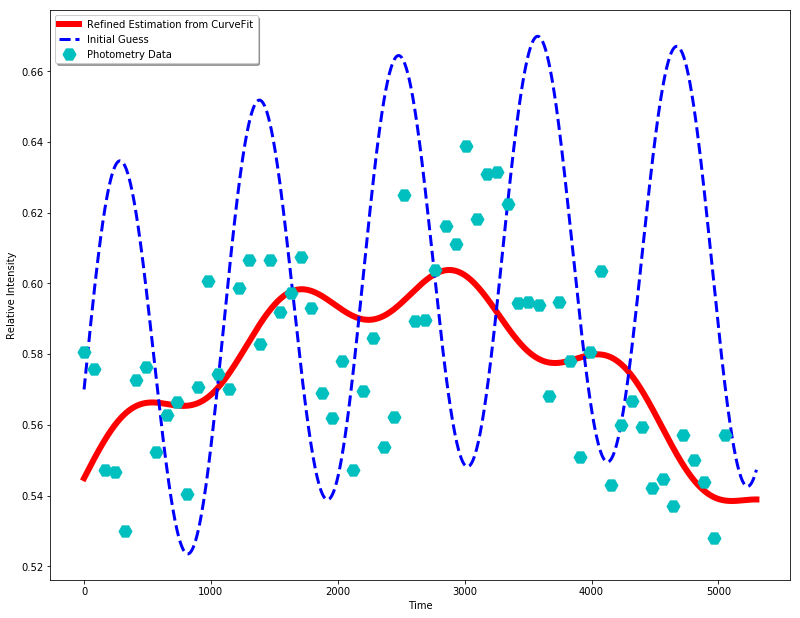

In [55]:
Z = np.linspace(0,5300,10000)

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5)

fig.tight_layout()

ax.set_xlabel("Time")
ax.set_ylabel("Relative Intensity")

ax.plot(Z, fit(Z, *fitpars), 'r-', linewidth=6, label="Refined Estimation from CurveFit")
ax.plot(Z, fit(Z,a_0,b_0,c_0,d_0,e_0), 'b--', linewidth=3, label="Initial Guess")

ax.plot(time_list,gwlib_apertures['frac of comp'],'cH',linestyle="None",markersize=13, label="Photometry Data");
ax.legend(loc=0,shadow=True);